
#  Breast Cancer Prediction


### Objective:

To create a predictive model that can accurately classify breast cancer cases as benign or malignant based on a set of relevant features. By leveraging historical data and applying machine learning techniques, aim is to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer.

### Exploratory Data Analysis

In [35]:
import numpy as np         
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('C:/Users/Admin/Desktop/Breast cancer.csv', index_col=False)

In [37]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
df.shape

(569, 32)

In [40]:
df.isnull().any()

id                         False
diagnosis                  False
Radius_mean                False
Texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [41]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [42]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

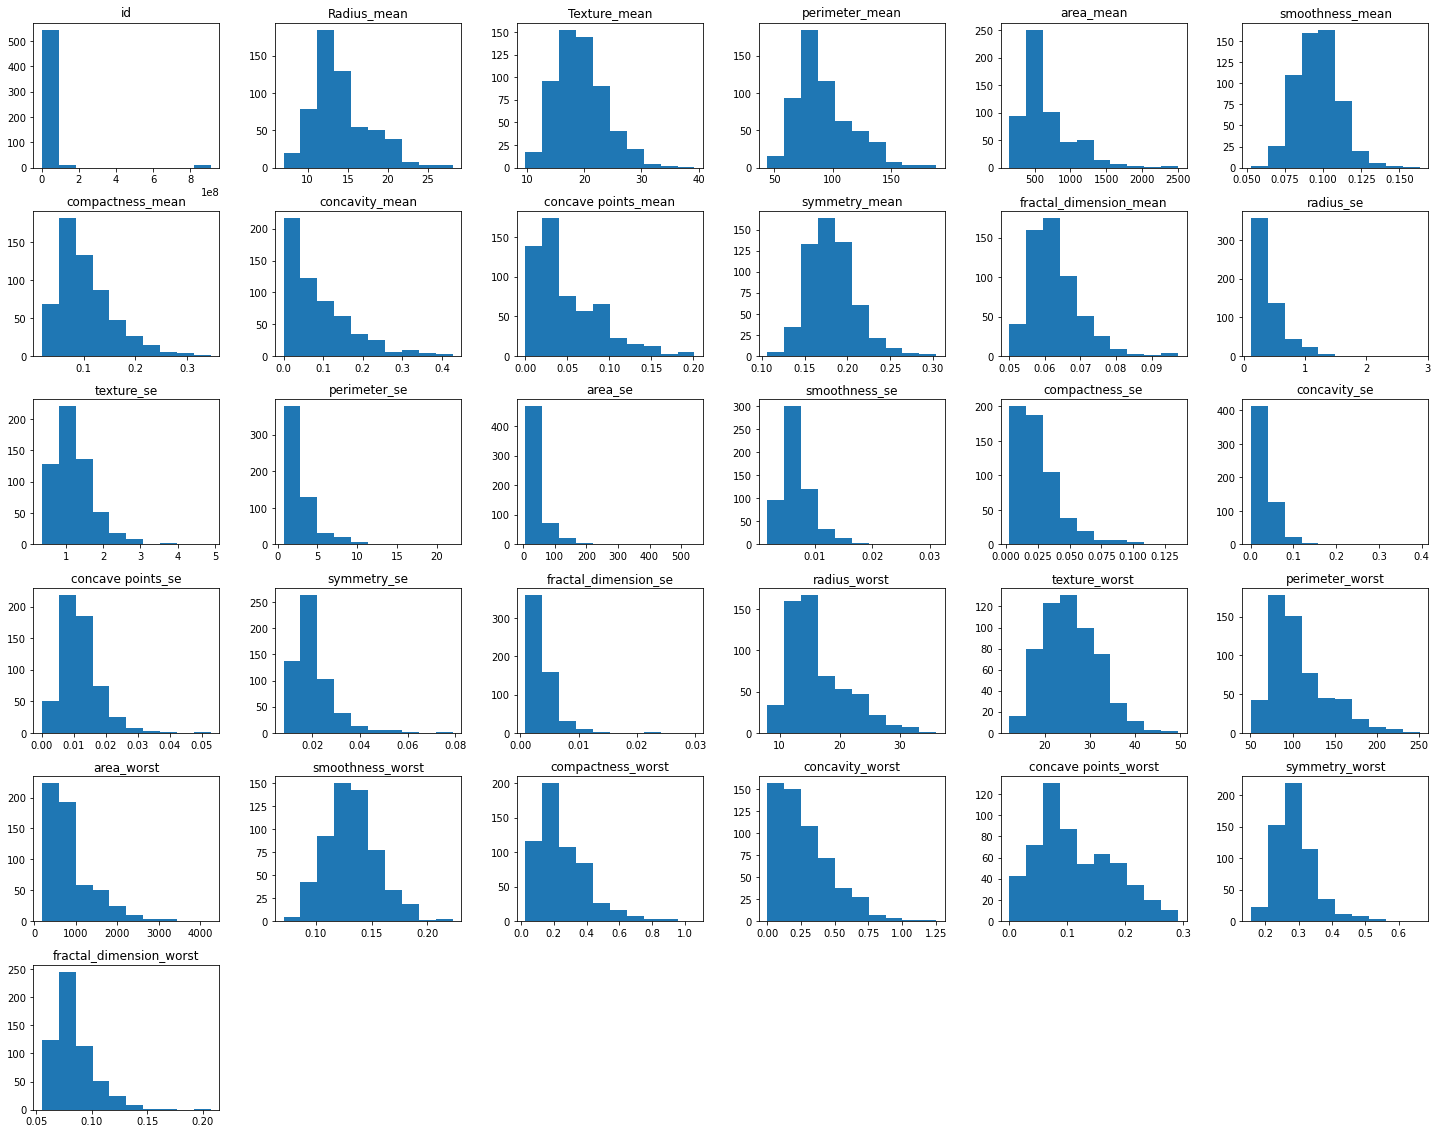

In [43]:
hist_mean=df.hist(bins=10, figsize=(25, 20),grid=False,)


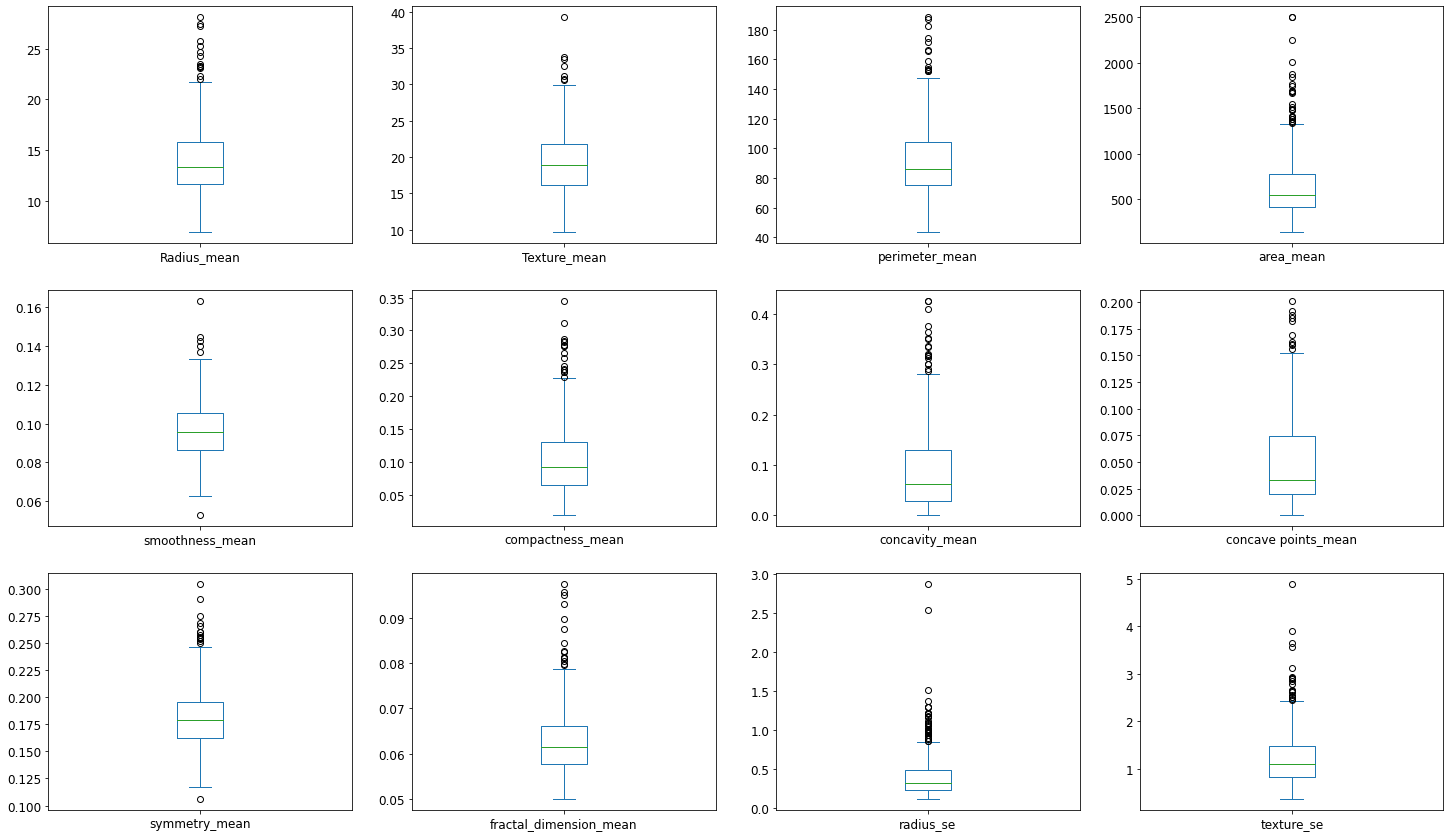

In [44]:
plt=df.iloc[:,2:14].plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12, figsize=(25, 20))

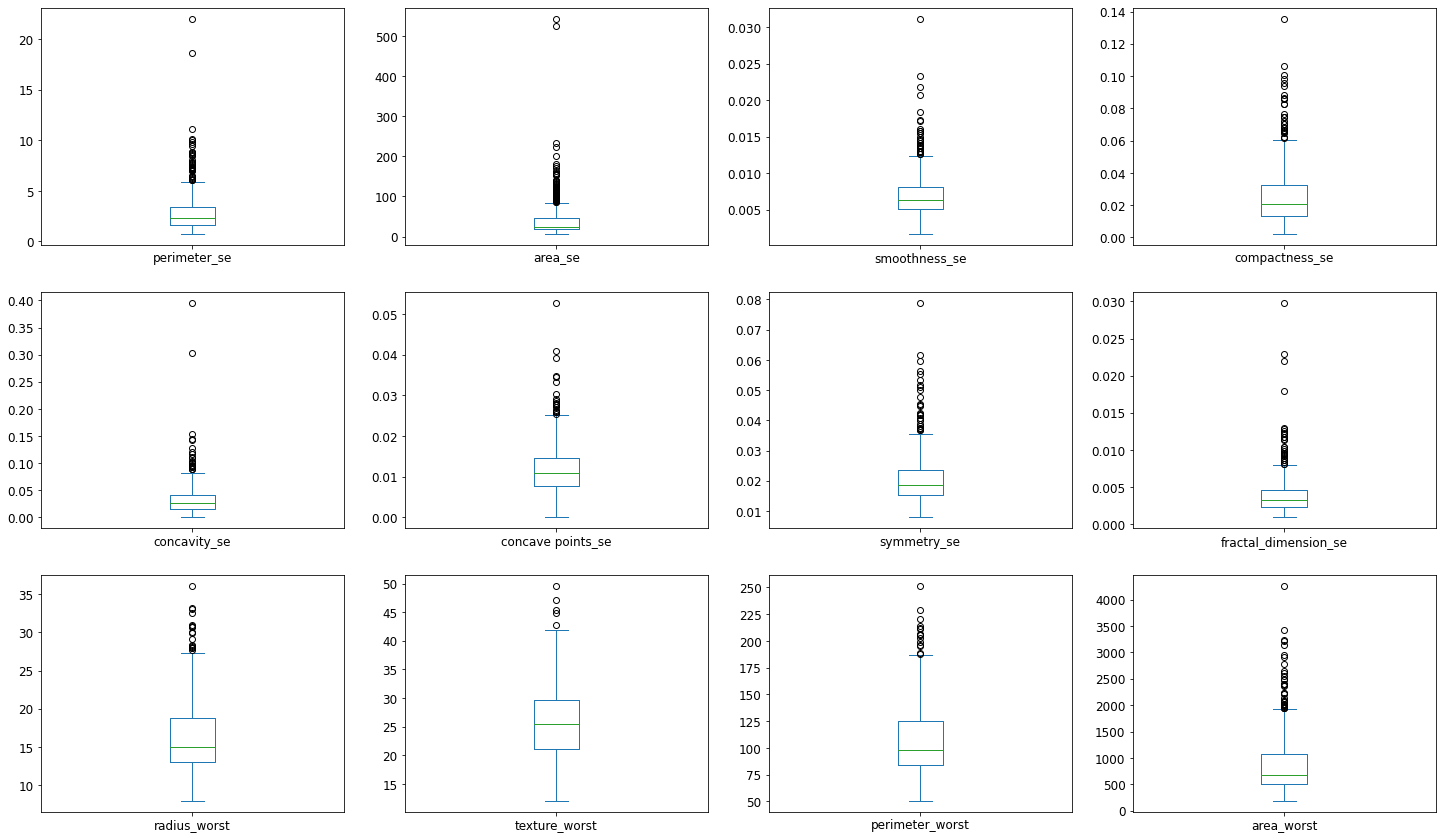

In [45]:
plt= df.iloc[:,14:26].plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=12, figsize=(25, 20))

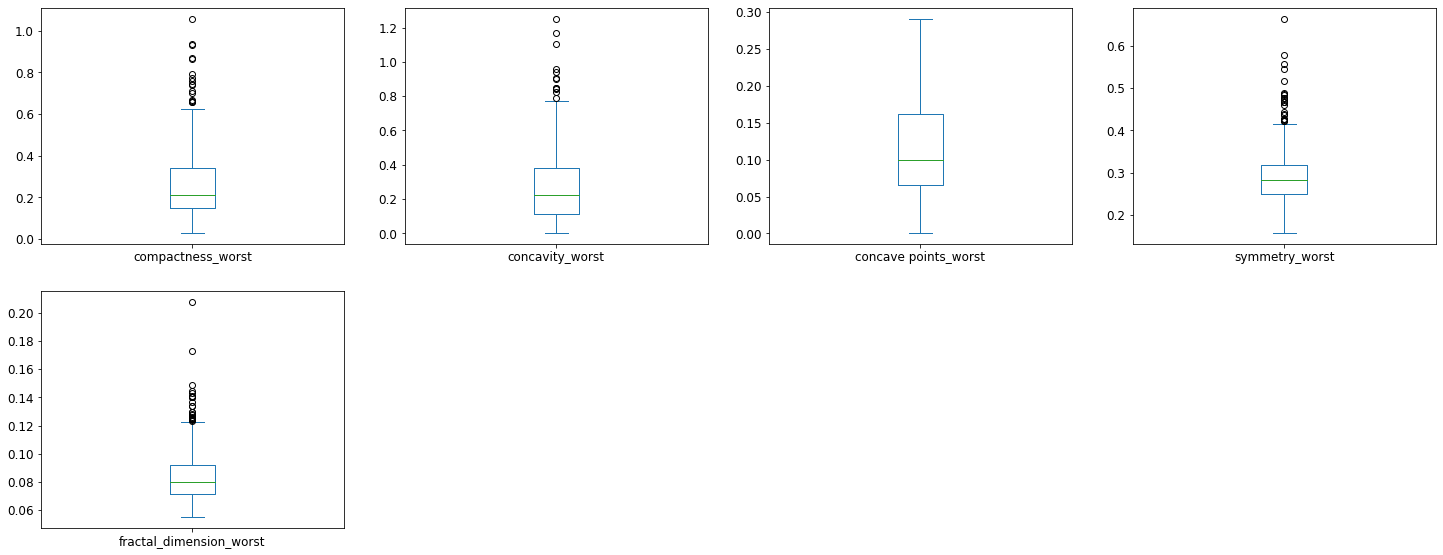

In [46]:
plt=df.iloc[:,27:].plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12, figsize=(25, 20))

In [47]:
df.drop(['id'],axis=1, inplace= True)

In [48]:
df

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [49]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

data_no_outliers = remove_outliers(df.drop('diagnosis',axis=1))
data= pd.concat([df['diagnosis'],data_no_outliers],axis=1)
data

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,NaN,NaN,0.14710,0.2419,...,25.380,17.33,184.60,NaN,0.16220,NaN,0.7119,0.2654,NaN,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,NaN,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,NaN,NaN,0.24140,0.10520,NaN,...,14.910,26.50,98.87,567.7,NaN,NaN,0.6869,0.2575,NaN,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,NaN,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,NaN,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,NaN,NaN,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,NaN,NaN,0.2650,0.4087,NaN


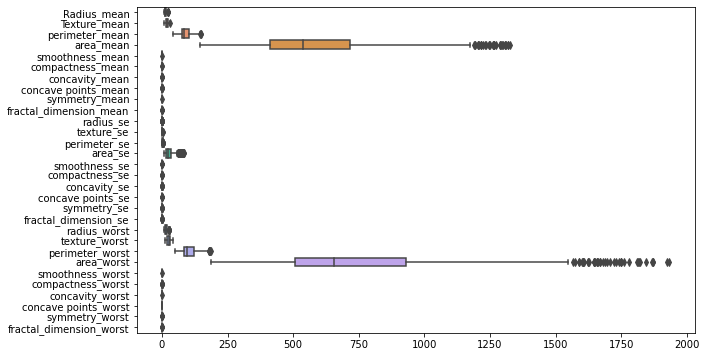

In [50]:
pl.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, orient="h")

In [51]:
data.isna().sum()

diagnosis                   0
Radius_mean                14
Texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

In [52]:
data= data.fillna(df.mean())

In [53]:
data['diagnosis']=pd.get_dummies(data['diagnosis'],drop_first=True)
data

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.000000,0.11840,0.104341,0.088799,0.14710,0.241900,...,25.380,17.33,184.60,880.583128,0.162200,0.254265,0.711900,0.2654,0.290076,0.118900
1,1,20.57,21.77,132.90,1326.000000,0.08474,0.078640,0.086900,0.07017,0.181200,...,24.990,23.41,158.80,880.583128,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,1,19.69,21.25,130.00,1203.000000,0.10960,0.159900,0.197400,0.12790,0.206900,...,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,1,11.42,20.38,77.58,386.100000,0.09636,0.104341,0.241400,0.10520,0.181162,...,14.910,26.50,98.87,567.700000,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946
4,1,20.29,14.34,135.10,1297.000000,0.10030,0.132800,0.198000,0.10430,0.180900,...,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,654.889104,0.11100,0.115900,0.243900,0.13890,0.172600,...,25.450,26.40,166.10,880.583128,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,1,20.13,28.25,131.20,1261.000000,0.09780,0.103400,0.144000,0.09791,0.175200,...,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,1,16.60,28.08,108.30,858.100000,0.08455,0.102300,0.092510,0.05302,0.159000,...,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,1,20.60,29.33,140.10,1265.000000,0.11780,0.104341,0.088799,0.15200,0.239700,...,25.740,39.42,184.60,1821.000000,0.165000,0.254265,0.272188,0.2650,0.408700,0.083946


In [54]:
data

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.000000,0.11840,0.104341,0.088799,0.14710,0.241900,...,25.380,17.33,184.60,880.583128,0.162200,0.254265,0.711900,0.2654,0.290076,0.118900
1,1,20.57,21.77,132.90,1326.000000,0.08474,0.078640,0.086900,0.07017,0.181200,...,24.990,23.41,158.80,880.583128,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,1,19.69,21.25,130.00,1203.000000,0.10960,0.159900,0.197400,0.12790,0.206900,...,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,1,11.42,20.38,77.58,386.100000,0.09636,0.104341,0.241400,0.10520,0.181162,...,14.910,26.50,98.87,567.700000,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946
4,1,20.29,14.34,135.10,1297.000000,0.10030,0.132800,0.198000,0.10430,0.180900,...,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,654.889104,0.11100,0.115900,0.243900,0.13890,0.172600,...,25.450,26.40,166.10,880.583128,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,1,20.13,28.25,131.20,1261.000000,0.09780,0.103400,0.144000,0.09791,0.175200,...,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,1,16.60,28.08,108.30,858.100000,0.08455,0.102300,0.092510,0.05302,0.159000,...,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,1,20.60,29.33,140.10,1265.000000,0.11780,0.104341,0.088799,0.15200,0.239700,...,25.740,39.42,184.60,1821.000000,0.165000,0.254265,0.272188,0.2650,0.408700,0.083946


<AxesSubplot:>

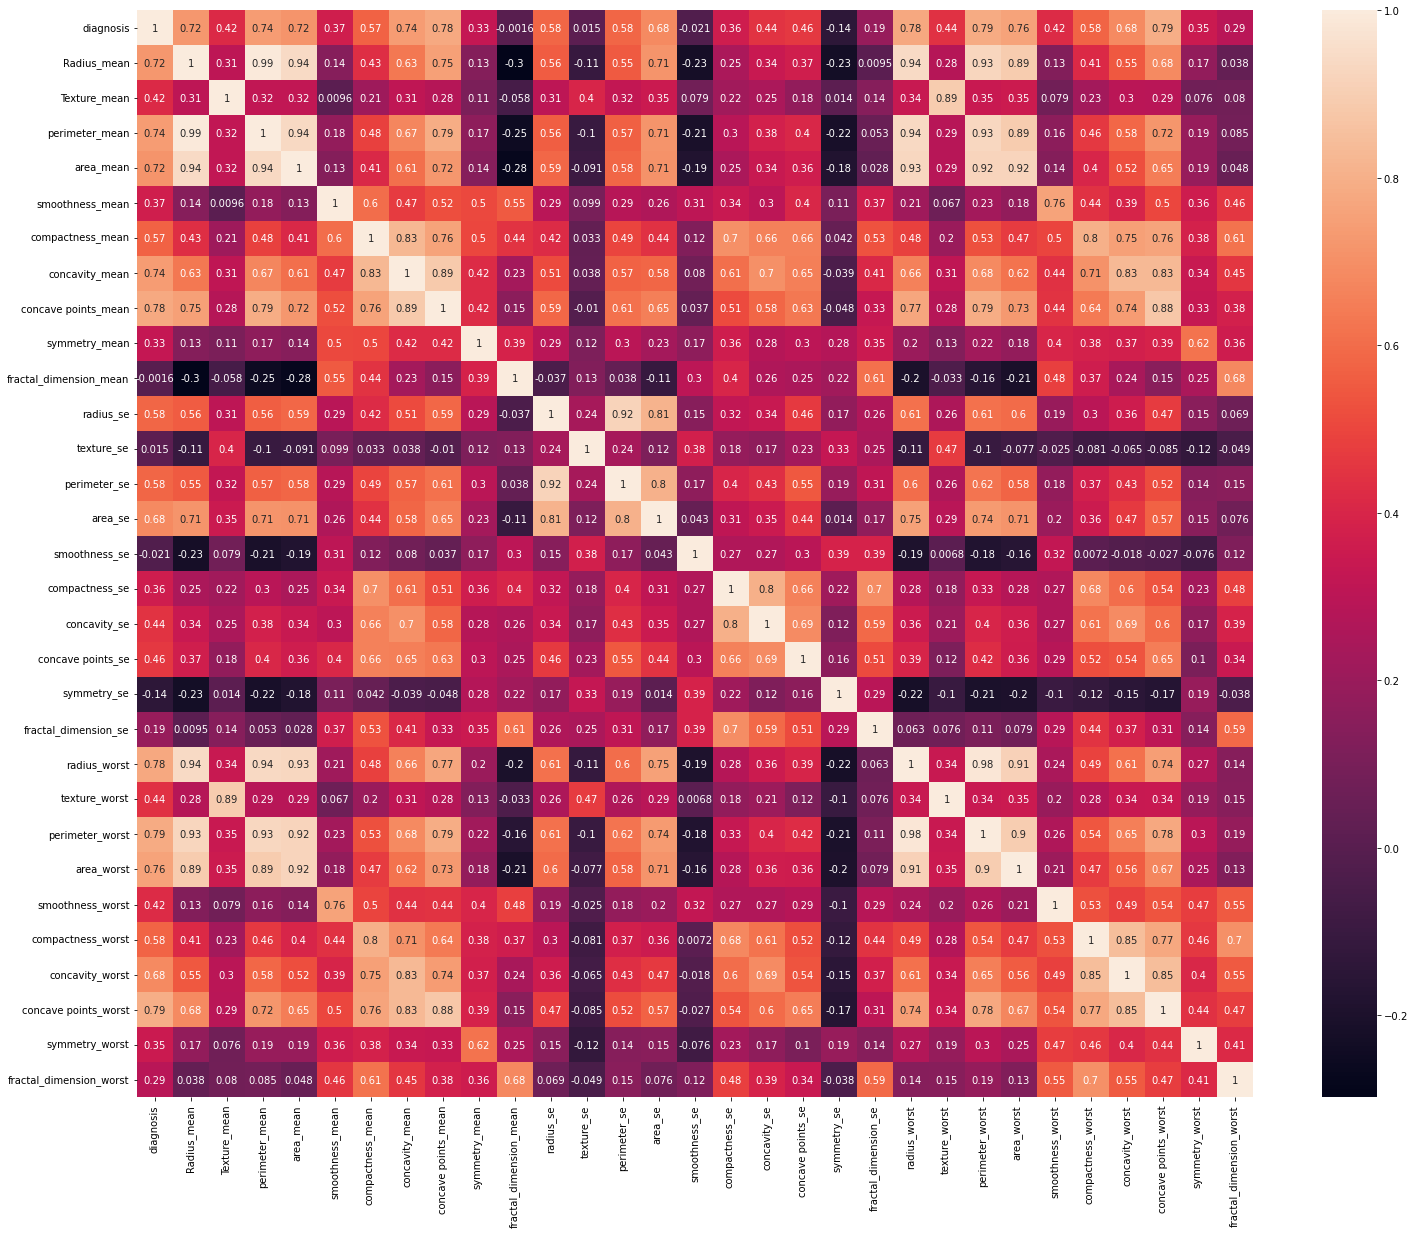

In [55]:
pl.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True)

In [56]:
 Corr= data.corr()['diagnosis']


In [57]:
limit=0.3
dropcolumns = Corr[Corr< limit].index.tolist()
dropcolumns

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se',
 'fractal_dimension_worst']

In [58]:
data.drop(dropcolumns, axis=1)

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.000000,0.11840,0.104341,0.088799,0.14710,0.241900,...,0.01587,25.380,17.33,184.60,880.583128,0.162200,0.254265,0.711900,0.2654,0.290076
1,1,20.57,21.77,132.90,1326.000000,0.08474,0.078640,0.086900,0.07017,0.181200,...,0.01340,24.990,23.41,158.80,880.583128,0.123800,0.186600,0.241600,0.1860,0.275000
2,1,19.69,21.25,130.00,1203.000000,0.10960,0.159900,0.197400,0.12790,0.206900,...,0.02058,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300
3,1,11.42,20.38,77.58,386.100000,0.09636,0.104341,0.241400,0.10520,0.181162,...,0.01867,14.910,26.50,98.87,567.700000,0.132369,0.254265,0.686900,0.2575,0.290076
4,1,20.29,14.34,135.10,1297.000000,0.10030,0.132800,0.198000,0.10430,0.180900,...,0.01885,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,654.889104,0.11100,0.115900,0.243900,0.13890,0.172600,...,0.02454,25.450,26.40,166.10,880.583128,0.141000,0.211300,0.410700,0.2216,0.206000
565,1,20.13,28.25,131.20,1261.000000,0.09780,0.103400,0.144000,0.09791,0.175200,...,0.01678,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200
566,1,16.60,28.08,108.30,858.100000,0.08455,0.102300,0.092510,0.05302,0.159000,...,0.01557,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800
567,1,20.60,29.33,140.10,1265.000000,0.11780,0.104341,0.088799,0.15200,0.239700,...,0.01664,25.740,39.42,184.60,1821.000000,0.165000,0.254265,0.272188,0.2650,0.408700


In [59]:
Y = data['diagnosis'].values 
x = data.drop(['diagnosis'] , axis = 1).values
X=StandardScaler().fit_transform(x)
pca=PCA(n_components=5)
x_pca=pca.fit_transform(X)
pca_df=pd.DataFrame(data=x_pca,columns=[f'PC{i+1}' for i in range(5)])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,6.363539,2.639825,-2.070391,2.923991,-0.714333
1,3.445116,-4.292695,-0.154328,0.917445,-0.479062
2,7.518161,-0.967021,-0.221441,1.368243,-0.883797
3,2.596975,1.977350,0.599348,0.250656,1.170012
4,5.608572,-1.857395,1.144504,4.151625,0.421104
...,...,...,...,...,...
564,5.384902,-1.645003,0.855191,0.932523,1.802556
565,5.156940,-4.366346,2.697505,-0.624559,-0.185870
566,2.569929,-2.226476,1.639449,-1.242752,2.410043
567,8.633096,-0.620502,2.050381,-1.286946,-2.954233


In [60]:
X_train , X_test , Y_train , Y_test  = train_test_split(pca_df , Y , test_size = 0.2 , random_state = 15)



In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)
confusion = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, logistic_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])
print("Confusion Matrix:")
print(confusion)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC: {:.2f}".format(auc))



Confusion Matrix:
[[72  3]
 [ 4 35]]
Accuracy: 0.94
Precision: 0.92
Recall: 0.90
F1-Score: 0.91
AUC: 0.98


In [62]:
from sklearn.neighbors import KNeighborsClassifier
k= 2
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, Y_train)
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)
confusion = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, knn_model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:, 1])
print("Confusion Matrix:")
print(confusion)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("AUC: {:.2f}".format(auc))


Confusion Matrix:
[[74  1]
 [ 6 33]]
Accuracy: 0.94
Precision: 0.97
Recall: 0.85
F1-Score: 0.90
AUC: 0.95
